## Logistic Regression

Breast Cancer data from [the UCI repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) contains records corresponding to 
cases of observed tumors.   There are a number of observations for each and a categorisation in the `class` column: 2 for benign (good), 4 for malignant (bad).  Your task is to build a logistic regression model to classify these cases. 

The data is provided as a CSV file.  There are a small number of cases where no value is available, these are indicated in the data with `?`. I have used the `na_values` keyword for `read_csv` to have these interpreted as `NaN` (Not a Number).  Your first task is to decide what to do with these rows. You could just drop these rows or you could [impute them from the other data](http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values).

You then need to follow the procedure outlined in the lecture for generating a train/test set, building and evaluating a model. Your goal is to build the best model possible over this data.   Your first step should be to build a logistic regression model using all of the features that are available.
  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [2]:
bcancer = pd.read_csv("files/breast-cancer-wisconsin.csv", na_values="?")
bcancer.head()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [3]:
# Examine the data, look at the statistical summary etc.
print(bcancer.shape)
bcancer.describe()

(699, 11)


,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
# deal with the NaN values in the data
# Using info() function to print the summary of the dataframe 
bcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample_code_number             699 non-null int64
clump_thickness                699 non-null int64
uniformity_cell_size           699 non-null int64
uniformity_cell_shape          699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    683 non-null float64
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [5]:
#Displaying the null values
bcancer[bcancer['bare_nuclei'].isnull()]

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [6]:
#Using dropna() function to erase the rows containing NaN values
bcancerDrop= bcancer.dropna(how = 'any', subset =['bare_nuclei'])
bcancerDrop.shape

(683, 11)

In [34]:
bcancerDrop['class'].value_counts()

2    444
4    239
Name: class, dtype: int64

In [18]:
#Using fillna() to specify 0 instead of NaN
bcancerFilled = bcancer.fillna(value = {"bare_nuclei": 0}) 
print(bcancerFilled.shape)
bcancerFilled.loc[617,:]

(699, 11)


sample_code_number             1057067.0
clump_thickness                      1.0
uniformity_cell_size                 1.0
uniformity_cell_shape                1.0
marginal_adhesion                    1.0
single_epithelial_cell_size          1.0
bare_nuclei                          1.0
bland_chromatin                      1.0
normal_nucleoli                      1.0
mitoses                              1.0
class                                2.0
Name: 617, dtype: float64

In [8]:
bcancerMedian = bcancer['bare_nuclei'].fillna(bcancer['bare_nuclei'].median(), inplace=True)

In [9]:
bcancerFilled.groupby('class').size()

class
2    458
4    241
dtype: int64

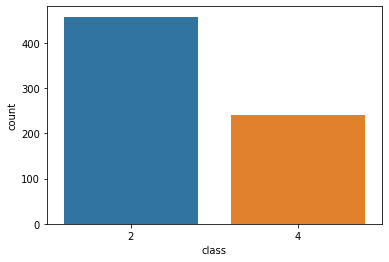

In [10]:
import seaborn as sns
sns.countplot(bcancerFilled['class'], label="Count")

In [36]:
# Build your first model - defining training and test data sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bcancerDrop.drop(['class'], axis=1), bcancerDrop['class'], stratify=bcancerDrop['class'], random_state=7)

# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

TypeError: Singleton array array('class', dtype='<U5') cannot be considered a valid collection.

In [26]:
# Using Logistic Regression to build a model

from sklearn.linear_model import LogisticRegression

# training model
lr = LogisticRegression().fit(X_train, y_train)

C:\Users\Bhagyashree\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
from sklearn.metrics import accuracy_score

# making predictions on training and test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# calculating accuracy score on training set
print("Acc on training set: ", accuracy_score(y_train, y_pred_train, normalize=True))

# calculating accuracy score on test set
print("Acc on test set: ", accuracy_score(y_test, y_pred_test, normalize=True))

Acc on training set:  0.654296875
Acc on test set:  0.6374269005847953


In [35]:
from sklearn.metrics import confusion_matrix
# Evaluation on train data
print("acc score on train data: ", accuracy_score(y_train, y_pred_train))
print("\n")
print(confusion_matrix(y_train, y_pred_train))

# Evaluation on test data
print("acc score on test data: ", accuracy_score(y_test, y_pred_test))
print("\n")
display(confusion_matrix(y_test, y_pred_test))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
(tn, fp, fn, tp)

acc score on train data:  0.654296875


[[335   0]
 [177   0]]
acc score on test data:  0.6374269005847953




array([[109,   0],
       [ 62,   0]], dtype=int64)

(109, 0, 62, 0)

### Evaluation

To evaluate a classification model we want to look at how many cases were correctly classified and how many
were in error.  In this case we have two outcomes - benign and malignant.   SKlearn has some useful tools, the 
[accuracy_score]() function gives a score from 0-1 for the proportion correct.  The 
[confusion_matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) function 
shows how many were classified correctly and what errors were made.  Use these to summarise the performance of 
your model (these functions have already been imported above).

In [15]:
# Evaluate the model


### Checkpoint

The checkpoint for this week workshop is to report accuracy on training and test set. Also, provide the confusion matrix to check for which class model is doing good and where error were are made. Based on these results, provide explaination about:
- Can we deploy this trained model in hospital's settings?
- Is model overfitting?
- For which class model is making error? Read about False Positive Rate (FPR) and False Negative Rate (FNR)

**On iLearn under Practical Week 6, make your submission in the form of results and their interpretation (1 paragraph) to get mark for this week checkpoint.**

### Feature Selection

Since you have many features available, one part of building the best model will be to select which features to use as input to the classifier. Your initial model used all of the features but it is possible that a better model can 
be built by leaving some of them out.   Test this by building a few models with subsets of the features - how do your models perform? 

This process can be automated.  The [sklearn RFE function](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) implements __Recursive Feature Estimation__ which removes 
features one by one, evaluating the model each time and selecting the best model for a target number of features.  Use RFE to select features for a model with 3, 4 and 5 features - can you build a model that is as good or better than your initial model?

## Conclusion

Write a brief conclusion to your experiment.  You might comment on the proportion of __false positive__ and __false negative__ classifications your model makes.  How useful would this model be in a clinical diagnostic setting? 